<a href="https://colab.research.google.com/github/Keunji123/class/blob/master/0215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Load MNIST DATASET

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
assert X_train.shape == (60000, 28, 28)

### Preprocessing
* 실수 범위가 너무 넓으면 잘 학습이 안된다..!  -> 정규화

In [8]:
X_train, X_test = X_train / 255, X_test / 255

In [15]:
sample = X_train[2255]

print("answer:", y_train[2255], '\n')

for i in range(sample.shape[0]):
  print(''.join(["1" if j>0 else "0" for j in sample[i]]))

answer: 1 

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000001111000000000000
0000000000001111000000000000
0000000000001111100000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000000111100000000000
0000000000001111000000000000
0000000000001111000000000000
0000000000001111000000000000
0000000000001111000000000000
0000000000001111000000000000
0000000000001111000000000000
0000000000001111000000000000
0000000000000111100000000000
0000000000000111110000000000
0000000000000111110000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


In [11]:
sample.shape[0]

28

In [12]:
sample[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [15]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    # validation_data = (X_test, y_test),
    epochs = 5, 
)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.1041 - val_accuracy: 0.9724
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.1108 - val_accuracy: 0.9725
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.1091 - val_accuracy: 0.9742
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.1196 - val_accuracy: 0.9717
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0165 - accuracy: 0.9943 - val_loss: 0.1059 - val_accuracy: 0.9767


In [20]:
_, acc = model.evaluate(X_test, y_test, verbose = 0)
acc

0.978600025177002

In [42]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

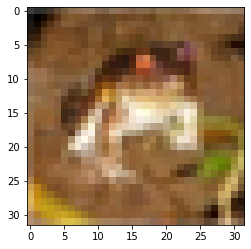

In [22]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(1024, kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation = 'softmax')

    
])

In [40]:
X_train = X_train /255,
X_test = X_test / 255

In [27]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [28]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 32
    epochs = 50
)

Epoch 1/50
1172/1172 [==============================] - 11s 7ms/step - loss: 1.9430 - accuracy: 0.2971 - val_loss: 1.8548 - val_accuracy: 0.3295
Epoch 2/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7436 - accuracy: 0.3749 - val_loss: 1.6823 - val_accuracy: 0.4170
Epoch 3/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.6671 - accuracy: 0.4003 - val_loss: 1.8363 - val_accuracy: 0.3629
Epoch 4/50
1172/1172 [==============================] - 7s 6ms/step - loss: 1.6178 - accuracy: 0.4220 - val_loss: 1.6700 - val_accuracy: 0.4010
Epoch 5/50
1172/1172 [==============================] - 8s 7ms/step - loss: 1.5714 - accuracy: 0.4362 - val_loss: 1.5714 - val_accuracy: 0.4428
Epoch 6/50
1172/1172 [==============================] - 8s 6ms/step - loss: 1.5386 - accuracy: 0.4494 - val_loss: 1.5243 - val_accuracy: 0.4590
Epoch 7/50
1172/1172 [==============================] - 8s 7ms/step - loss: 1.5086 - accuracy: 0.4650 - val_loss: 1.4962 - val_accuracy

### CNN으로 모델 짜기

In [31]:
X_train

(array([[[[0.23137255, 0.24313725, 0.24705882],
          [0.16862745, 0.18039216, 0.17647059],
          [0.19607843, 0.18823529, 0.16862745],
          ...,
          [0.61960784, 0.51764706, 0.42352941],
          [0.59607843, 0.49019608, 0.4       ],
          [0.58039216, 0.48627451, 0.40392157]],
 
         [[0.0627451 , 0.07843137, 0.07843137],
          [0.        , 0.        , 0.        ],
          [0.07058824, 0.03137255, 0.        ],
          ...,
          [0.48235294, 0.34509804, 0.21568627],
          [0.46666667, 0.3254902 , 0.19607843],
          [0.47843137, 0.34117647, 0.22352941]],
 
         [[0.09803922, 0.09411765, 0.08235294],
          [0.0627451 , 0.02745098, 0.        ],
          [0.19215686, 0.10588235, 0.03137255],
          ...,
          [0.4627451 , 0.32941176, 0.19607843],
          [0.47058824, 0.32941176, 0.19607843],
          [0.42745098, 0.28627451, 0.16470588]],
 
         ...,
 
         [[0.81568627, 0.66666667, 0.37647059],
          [0.78823

In [43]:
X_shape = X_train.shape
X_shape

(50000, 32, 32, 3)

In [47]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (X_shape[1:])))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1024, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [48]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [50]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 32,
    epochs = 50
)

Epoch 1/50
1172/1172 [==============================] - 18s 8ms/step - loss: 1.8477 - accuracy: 0.3195 - val_loss: 1.5785 - val_accuracy: 0.4331
Epoch 2/50
1172/1172 [==============================] - 12s 11ms/step - loss: 1.4866 - accuracy: 0.4592 - val_loss: 1.4139 - val_accuracy: 0.4928
Epoch 3/50
1172/1172 [==============================] - 12s 10ms/step - loss: 1.3508 - accuracy: 0.5151 - val_loss: 1.3834 - val_accuracy: 0.5122
Epoch 4/50
1172/1172 [==============================] - 16s 14ms/step - loss: 1.2766 - accuracy: 0.5459 - val_loss: 1.1763 - val_accuracy: 0.5858
Epoch 5/50
1172/1172 [==============================] - 15s 13ms/step - loss: 1.2075 - accuracy: 0.5706 - val_loss: 1.1874 - val_accuracy: 0.5787
Epoch 6/50
1172/1172 [==============================] - 11s 9ms/step - loss: 1.1560 - accuracy: 0.5951 - val_loss: 1.1327 - val_accuracy: 0.5980
Epoch 7/50
1172/1172 [==============================] - 13s 11ms/step - loss: 1.1128 - accuracy: 0.6092 - val_loss: 1.1455 - v

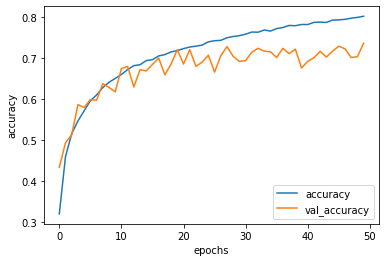

In [53]:
import matplotlib.pyplot as plt

n = len(history.history['accuracy'])
plt.plot(range(n), history.history['accuracy'], label = 'accuracy')
plt.plot(range(n), history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right')

plt.show()